In [1]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
%matplotlib inline

In [2]:
!wget --output-document lena.png https://ibm.box.com/shared/static/yqjnv0890doeu3mwb2u97f8rh1p0gd98.png

--2017-11-02 23:58:24--  https://ibm.box.com/shared/static/yqjnv0890doeu3mwb2u97f8rh1p0gd98.png
Resolving ibm.box.com (ibm.box.com)... 107.152.25.197, 107.152.24.197
Connecting to ibm.box.com (ibm.box.com)|107.152.25.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/shared/static/yqjnv0890doeu3mwb2u97f8rh1p0gd98.png [following]
--2017-11-02 23:58:26--  https://ibm.ent.box.com/shared/static/yqjnv0890doeu3mwb2u97f8rh1p0gd98.png
Resolving ibm.ent.box.com (ibm.ent.box.com)... 107.152.24.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|107.152.24.211|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/KOMvaaFYuydYt7_n9Rc7aPpWDJwZkYYKsLmPWLs7H1eZWwbhnxcO3GmGNjYP-N-7P4JpsoD4h_wIhj66qcvXE7YxoEi5zblXqZI47Zg5DaA8Stprdo-PQiz4t7wLPQZ1_N1eiMWdDCZPQ7MqM9V_YAuyQd39tm3meRdqYENZWcjaAl-Ylt1z9SLfZNdHzKPPUNPJWrCyC_kF41EiCmqHyZTgIKSEIpRJUPe4hx88vV5Xi8yZu5HkaKgjQexliMuwI-2q6av_L

/home/salman/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


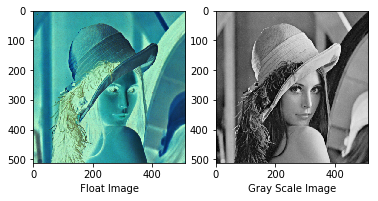

In [3]:
#read the image as Float data type
im=misc.imread("lena.png").astype(np.float)

#im=misc.imread("one.png").astype(np.float)

#Convert image to gray scale
grayim=np.dot(im[...,:3], [0.299, 0.587, 0.114])


#Plot the images
%matplotlib inline

plt.subplot(1, 2, 1)
plt.imshow(im)
plt.xlabel(" Float Image ")

plt.subplot(1, 2, 2)
plt.imshow(grayim, cmap=plt.get_cmap("gray"))
plt.xlabel(" Gray Scale Image ")

In [4]:
grayim.shape

(512, 512)

In [5]:
Image = np.expand_dims(np.expand_dims(grayim, 0), -1)
print Image.shape

(1, 512, 512, 1)


In [7]:
img = tf.placeholder(tf.float32, shape=[None,512,512,1])
print img.shape

(?, 512, 512, 1)


In [8]:
weights = tf.Variable(tf.truncated_normal([5,5,1,1], stddev=0.05))
print weights.shape

(5, 5, 1, 1)


In [9]:
conOut = tf.nn.conv2d(img, weights, strides=[1,1,1,1], padding='SAME')

conOut2 = tf.nn.conv2d(img, weights, strides=[1,1,1,1], padding='VALID')

In [10]:
init = tf.global_variables_initializer()
sess= tf.Session()
sess.run(init)

In [13]:
result = sess.run(conOut, feed_dict={img: Image})

result2 = sess.run(conOut2, feed_dict={img: Image})

In [14]:
# for the result with 'SAME' Padding 

#reduce the dimension
vec = np.reshape(result, (1, -1));
# Reshape the image
image= np.reshape(vec,(512,512))

print image.shape


# for the result with 'VALID' Padding 

#reduce the dimension
vec2 = np.reshape(result2, (1, -1));
# Reshape the image
image2= np.reshape(vec2,(508,508))

print image2.shape

(512, 512)
(508, 508)


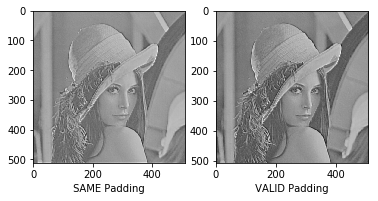

In [15]:
#Plot the images
%matplotlib inline

plt.subplot(1, 2, 1)
plt.imshow(image,cmap=plt.get_cmap("gray"))
plt.xlabel(" SAME Padding ")

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap=plt.get_cmap("gray"))
plt.xlabel(" VALID Padding ")

In [16]:
def conv2d (X,W):
    return tf.nn.conv2d(X, W, strides=[1,1,1,1], padding='SAME')

def MaxPool (X):
    return tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [18]:
weights = {'W_conv1': tf.Variable(tf.random_normal([5,5,1,32]))}
biases = {'b_conv1': tf.Variable(tf.random_normal([32]))}

In [22]:
conv1 = tf.nn.relu(conv2d(img, weights['W_conv1']) + biases['b_conv1'])

Mxpool = MaxPool(conv1)

print conv1.get_shape().as_list()
print Mxpool.get_shape().as_list()

[None, 512, 512, 32]
[None, 256, 256, 32]


In [23]:
init = tf.global_variables_initializer()
sess= tf.Session()
sess.run(init)

In [24]:
Layer1 = sess.run(Mxpool, feed_dict={img: Image})

(1, 256, 256, 32)
(256, 256, 32)


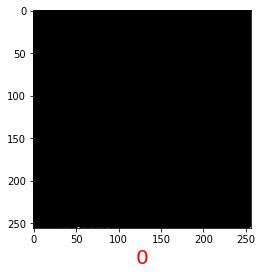

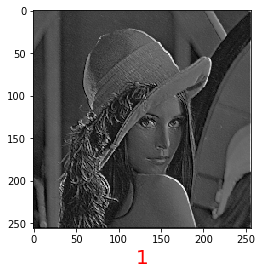

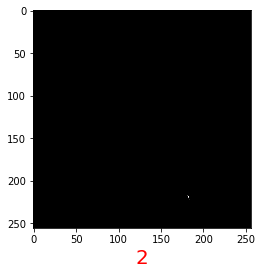

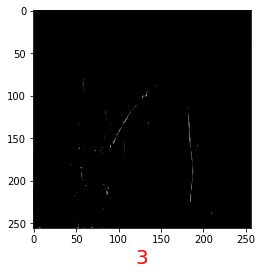

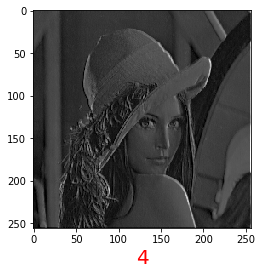

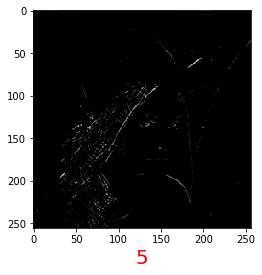

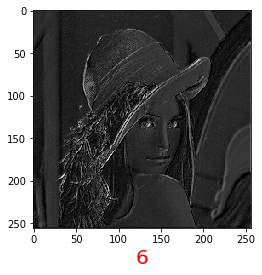

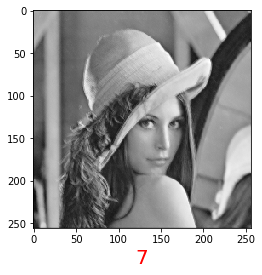

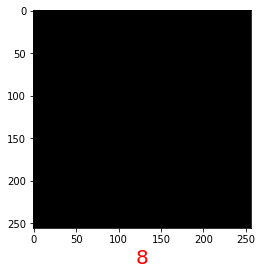

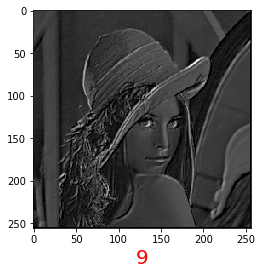

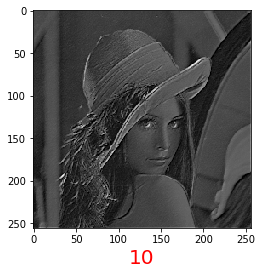

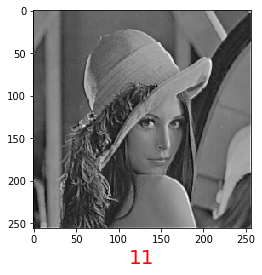

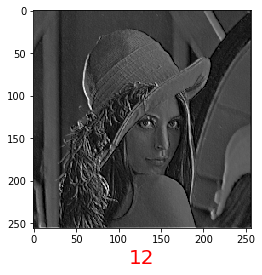

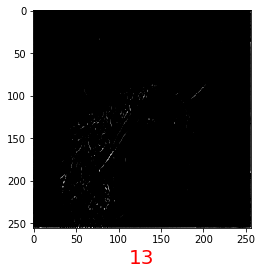

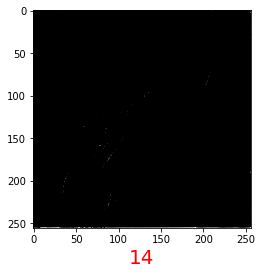

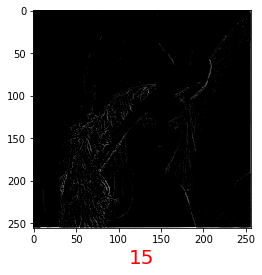

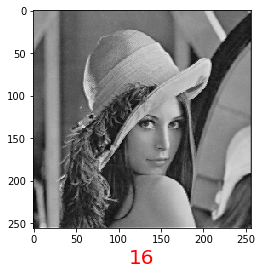

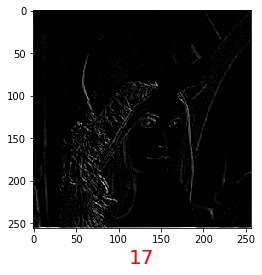

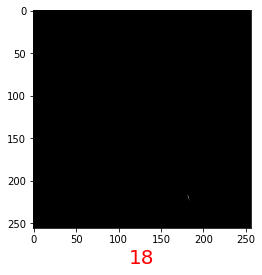

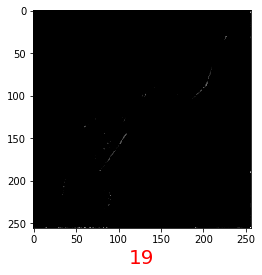

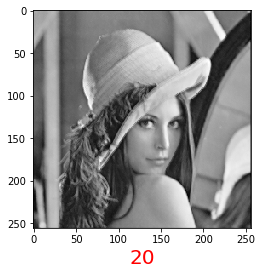

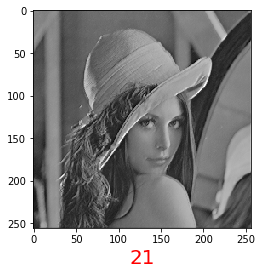

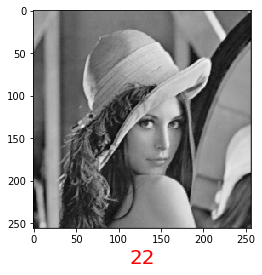

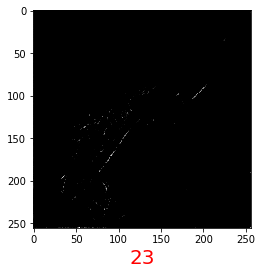

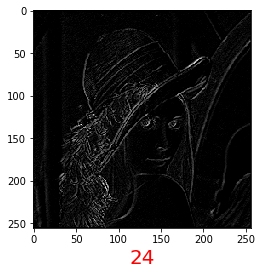

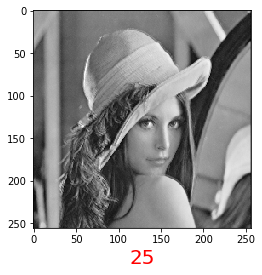

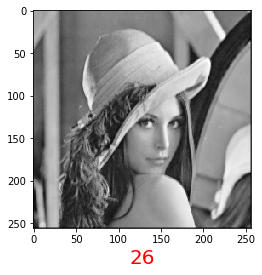

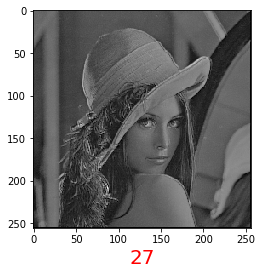

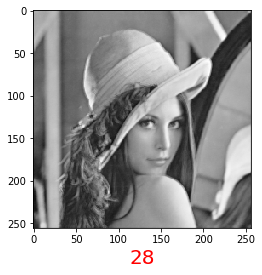

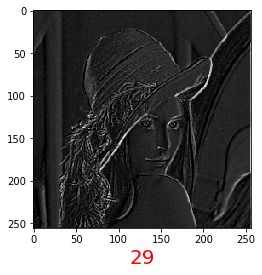

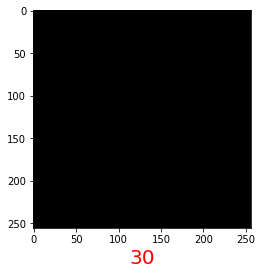

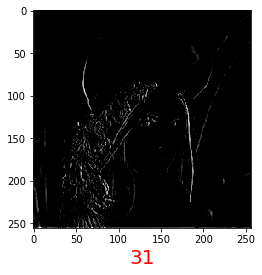

In [25]:
print Layer1.shape

vec = np.reshape(Layer1, (256,256,32));
print vec.shape

for i in range (32):
    
    image=vec[:,:,i]
    plt.imshow(image,cmap=plt.get_cmap("gray"))
    plt.xlabel( i , fontsize=20, color='red')
    plt.show()
    plt.close()